# Analysing pattern of Apartment rentals in and around Nizampet

**OBJECTIVE** : Analyzing the trends in Apartment rental prices (posted by house owners) and observe the correlation between prices and other features of house.
    
**STEPS** : To achieve the above task, we are supposed to perform A series of sub tasks. Below are the sub tasks:
        
            1) Data Collection
            2) Data Pre processing and analysis
            3) Data Visualization
            
We will go though each subtask in detail in below cells. Here we go :
 

# T1 : Data Collection
    
Data collection is the first and foremost thing before we do anything. Data can be available in any format such files, database tables,audios,videos etc.

However , in our case we dont have any prepared dataset to work with. Data related to our project is available on **Housing.com** website which is posted by house owners. Many more websites do have rental details but I found housing.com has more results set and hence i chose that.

In general, If data is present on website ,then we need to extract infromation either using **API calls** or **scraping**. Since **Housing.com** didnt provide any API to access information and hence we will develop a **scraper** which can grab the infromation from website which we are looking for.

Without wasting our time lets do some code
    
Before we code, make sure that below modules are installed in your environment. Im using CONDA environment and so most of the packages are pre installed. If you are working on some other environment which doesnt has these packages pre installed try below command in your command prompt line inorder to download them.
    
**pip install module name**


In [12]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup as bs
import pandas as pd
from matplotlib import pyplot as plt
import html

I have imported modules and now we will see why we need these modules. I will give a one line description about these packages:
    
**Selenium** : Used to automate web browsing operations such as opening,scrolling,click on links ,closing etc.. and extract the information stored in html tags using HTTP protocols.
    
**Time** : used to delay process in this project, but there is lot more scope so check documenation available for time module 
    
**Beautiful soup**: used to extract information from websites
    
**Pandas** : used to perform exploratory analysis
    
**Matplotlib** : to create visual plots based on data
    
**HTML** : used to parse html tags in this project but there is lot more scope so check documenation available for html module
        
Coming to data collection part, we are using selenium to automate the opening ,scrolling down,extract page source (containing html tags) and closing page operations. Beautiful soup is to extract data from page source.

We are looking to scrape information such as price,no of bedrooms,address,house type(apartments or independent houses or villas),Area and other details for each house listed on website.

Here is **scraper** code :



In [13]:
driver=webdriver.Chrome()

driver.get("https://housing.com/rent/search-P1wkiyiuy2aujb8n2")

for i in range(1,15):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(4)
html=driver.page_source
driver.close()
page=bs(html,"html.parser")

elements=page.findAll("article",{"class":"css-8jw9t9"})

records_set=[]
for i in elements:
    price=i.find("div",{"data-q":"price"})
    details=i.find("a",{"class":"css-dk6esa"})
    address=i.find("a",{"data-q":"address"})
    features=i.findAll("span",{"class":"css-1kdq3fk"})
    records_set.append([price.text,details.text,address.text,features[0].text,features[1].text])

Above code performs the below tasks in sequential order :
    
1) Selecting the browser to open the website. Here you can select Firefox or chrome. (It automatically opens window)

2) Enter url **Housing.com** in chrome window (automated)

3) Scrolling down to the end of the page where no more loading happens. We usually see this in e commerce websites.

4) Now the page is loaded completely, we extract page source (containing html tags and data embed)

5) Close driver (now it automatically closes window if the above commands worked fine without error)

6) Parse the page source using beautiful soup with html parser.

7) Find the elements where the data resides in parsed page source.

8) loop through elemnts and extract the data in form of 2d lists.

# T2: Data Pre processing and Data analysis

This is the most important part of data analysis. We need to check for missing data or nulls, datatypes,duplicates etc.. to proceed to data analysis.

Now that we have list as result from above code. We will import data to dataframe (table like structure) and specify field names.

In [14]:
df=pd.DataFrame(records_set)
df.columns=["Price","Details","Address","features","Area"]
print(df.head())

    Price                  Details  \
0  18,000          3 BHK Apartment   
1  17,000          3 BHK Apartment   
2  15,000          2 BHK Apartment   
3   8,000  1 BHK Independent House   
4   9,500          1 BHK Apartment   

                                             Address        features  \
0                     Vasanth Nagar Colony, Nizampet  Semi Furnished   
1  Nizampet , Adithya Nagar, Pragathi Nagar Rd, S...  Semi Furnished   
2                        Ram Naresh Colony, Nizampet     Unfurnished   
3                        Ram Naresh Colony, Nizampet     Unfurnished   
4                          Nizampet X Road, Nizampet     Unfurnished   

         Area  
0  1600 sq.ft  
1  1150 sq.ft  
2  1200 sq.ft  
3   700 sq.ft  
4   650 sq.ft  


Now we will see for nulls in data throughout the dataframe. so we are using describe function to get counts

In [15]:
print(df.describe())

         Price          Details                         Address  \
count      112              112                             112   
unique      27               12                              67   
top     15,000  2 BHK Apartment  Vasanth Nagar Colony, Nizampet   
freq        18               49                              21   

              features        Area  
count              112         112  
unique               3          51  
top     Semi Furnished  1100 sq.ft  
freq                54          13  


So it seems like the counts are equal for all columns so we dont have any missing values. Thats great !

Now lets proceed further casting datatypes to perform some numerical operations


In [16]:
df["Bedrooms"]=df["Details"].apply(lambda x:int(x.split(" ")[0]))
df["House_type"]=df["Details"].apply(lambda x:x.split(" ")[2])
df.drop(columns=["Details"],inplace=True)
df["Area"]=df["Area"].apply(lambda x:float(x.split(" ")[0]))
df["Price"]=df["Price"].apply(lambda x:int("".join(x.split(","))))
df[["Address","features","House_type"]]=df[["Address","features","House_type"]].astype(str)

There might be a chance of a person placing the same advertisement multiple times on website. Hence we are removing the duplicates.

In [17]:
df.drop_duplicates(keep='first',inplace=True)

Load data to csv file. Its always good practice to keep files as logs for further analysis. Howver we will work on existing data frames in further analysis.

In [18]:
df.to_csv("house_rentals.csv",header=True,index=False,mode='w')

Filter the data by House type Apartment ( Our analysis is limited to apartments for now).

Check correlation between Target variable=Price and features = Area and number of bedrooms (pair wise correlation)

In [19]:
df1=df[df["House_type"]=="Apartment"]
print(df1.corr())

             Price      Area  Bedrooms
Price     1.000000  0.619607  0.429418
Area      0.619607  1.000000  0.744188
Bedrooms  0.429418  0.744188  1.000000


**Below are my observations**:(after checking correlation matrix)

1) It is clear that feature Area and Bedrooms has strong relationship. But it is pretty much expected that when number of Bedrooms increases Area does increase.

2) When it comes to relation with Price, both has positive relationship. However Area has more correlation with Price than number of bedrooms. Hence we can say Area is feature which affects the price. But this inference is pretty much expected as Area increases, price do increase.

# T3 : Data Visualization

Previously we formulated a correlations table and drawn some insights from it. However correlations doesnt say everything about data untill we visualize 

This task is something which we cant ignore because this is the only way we can show our business clients about the data we worked on. Numbers are helpful but without plot, it doesnt make any sense. 

If we miss this out, there is a chance of losing some critical infromation which numbers didnt say. So its must and should for every analyst to work on.

Coming back to topic, there is correlation matrix but I want to visualize it to see how well they are correlated. For now we will see correlation between price and other variables.

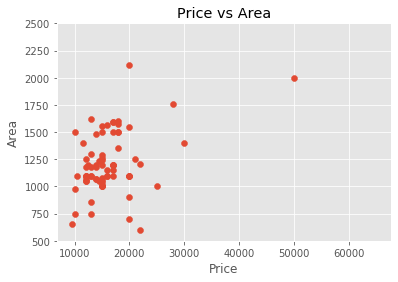

In [21]:
plt.style.use("ggplot")

df2=df1.sort_values("Price",ascending=False)

plt.scatter(df2["Price"],df2["Area"])
plt.xlabel("Price")
plt.ylabel("Area")
plt.ylim(500,2500)
plt.title("Price vs Area")
plt.savefig("House_price_vs_Area.png")


We plotted Price and Area information on **scatter** plot to see how data points are spread out. 

**Below are my observations** :

1) All I see there is , we cant really fit a linear curve passing though all data points. So that means the relation between Area and price might not be linear or proportional ( Its just a guess for now) . We need to draw a regression line and see which has correct fit and what would be ideal for this scenario.

2) There is very less data available for Apartments of Area greater than 2000 sq ft and above. So it is difficult to analyze these data points but we will see what we can do about them.

3) Most of the data is between 500 and 1700 sqft Area Apartments. So if the customer is looking for this particular range of house area, it will be easy for us to suggest them the best house for best price. We need to check the anomalies present (i.e) If a house rent is cheap when compared to others we need to realize, what would be the reasons to be that way. If ther is no obligation or so it might become a good option for customers. 